In [1]:
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
def get_even_num(num=63):
    runs = []
    evens = []
    j = 0
    for i in range(num):
        if (i != 0) & (i != 2):
            if i % 2 == 0:
                evens.append(str(i))
                j += 1
                if j == 5: 
                    runs.append(evens)
                    evens = []
                    j = 0
    return runs

In [3]:
sub_path_36 = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/R21_36_Cyl_Aqueous/"
sub_path_37 = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/R21_37_Cyl_Aqueous/"
sub_path_38 = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/R21_38_Cyl_Aqueous/"
#cwd_path = sub_path+"/NIFTI/bmaps_numpy/"
tes = [2.46, 4.61, 7.09, 10.5, 15.0, 20.0, 24.5, 29.0, 33.5, 38.0, 42.5, 47.0]

base_runs = get_even_num()
bp = [['6','4'],['10','4'],['6','10']],[['16','14'],['20','14'],['16','20']],[['26','24'],['30','24'],['26','30']],[['36','34'],['40','34'],['36','40']],[['46','44'],['50','44'],['46','50']],[['56','54'],['60','54'],['56','60']]


In [4]:
base_runs

[['4', '6', '8', '10', '12'],
 ['14', '16', '18', '20', '22'],
 ['24', '26', '28', '30', '32'],
 ['34', '36', '38', '40', '42'],
 ['44', '46', '48', '50', '52'],
 ['54', '56', '58', '60', '62']]

In [5]:
bp

([['6', '4'], ['10', '4'], ['6', '10']],
 [['16', '14'], ['20', '14'], ['16', '20']],
 [['26', '24'], ['30', '24'], ['26', '30']],
 [['36', '34'], ['40', '34'], ['36', '40']],
 [['46', '44'], ['50', '44'], ['46', '50']],
 [['56', '54'], ['60', '54'], ['56', '60']])

# Extract data

In [14]:
def extract_mean_data(sub_path, experiment):
    print(sub_path)
    cwd_path = sub_path+"/NIFTI/bmaps_numpy/"
    result = pd.DataFrame()
    for m in range(len(base_runs)):   
        tdir = cwd_path+bp[m][0][0]+"minus"+bp[m][0][1]+"/"
        theory_img = nib.load(tdir+"Bvals.nii")
        theory_data = theory_img.get_data()
        sp = theory_data.shape
        b_data = []

        for i in range(sp[0]):
            for j in range(sp[1]):
                for k in range(sp[2]):
                    b_data.append([experiment, i, j, k, m+1, theory_data[i][j][k]])

        b_pd = pd.DataFrame(b_data, columns=['exp', 'i', 'j', 'k', 'mini', 'theory'])

        runs = pd.DataFrame()
        for n in range(len(base_runs[m])):
            bdir = cwd_path+"base_run_"+base_runs[m][n]+"/"
            print(base_runs[m][n])

            new_data = []      
            fmap_img = nib.load(bdir+"4d_fmap_Mean.nii.gz")
            fmap_data = fmap_img.get_data()
            sp = fmap_data.shape

            for i in range(sp[0]):
                for j in range(sp[1]):
                    for k in range(sp[2]):
                        new_data.append([experiment, i, j, k, m+1, fmap_data[i][j][k]])

            new_pd = pd.DataFrame(new_data, columns=['exp', 'i', 'j', 'k', 'mini', 'fmap_mean'])
            if n == 0:
                runs = new_pd
            else:
            runs = runs.merge(new_pd, on=['exp', 'i', 'j', 'k', 'mini'], sort=False)


        runs = runs.merge(b_pd, on=['exp','i', 'j', 'k', 'mini'], sort=False)
        result = result.append(runs, ignore_index=True)
    return result

In [15]:
result_36 = extract_mean_data(sub_path_36, '36')

/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/R21_36_Cyl_Aqueous/
4


KeyError: 'exp'

In [12]:
print(result_36.shape)

(1081344, 11)


In [17]:
result_36.describe()

,i,j,k,mini,fmap_mean_x,fmap_mean_y,fmap_mean_x,fmap_mean_y,fmap_mean,theory
count,1.081344e+06,1.081344e+06,1.081344e+06,1.081344e+06,1.081344e+06,1.081344e+06,1.081344e+06,1.081344e+06,1.081344e+06,1.081344e+06
mean,2.150000e+01,3.150000e+01,3.150000e+01,3.500000e+00,-1.083427e+02,-1.087055e+02,-1.132479e+02,-1.176157e+02,-1.173764e+02,2.017939e+00
std,1.269843e+01,1.847296e+01,1.847296e+01,1.707826e+00,4.506393e+02,4.533254e+02,4.500751e+02,4.540227e+02,4.566990e+02,7.472814e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.422362e+04,-1.418835e+04,-1.252448e+04,-1.425134e+04,-1.239863e+04,-2.663090e+02
25%,1.075000e+01,1.575000e+01,1.575000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.150000e+01,3.150000e+01,3.150000e+01,3.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.225000e+01,4.725000e+01,4.725000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.300000e+01,6.300000e+01,6.300000e+01,6.000000e+00,6.884447e+03,6.951476e+03,6.910605e+03,6.734169e+03,6.822102e+03,3.047569e+02


## 11 data

In [6]:
def extract_11_data(sub_path, experiment):
    print(sub_path)
    cwd_path = sub_path+"/NIFTI/bmaps_numpy/"
    result = pd.DataFrame()
    for m in range(len(base_runs)):   
        tdir = cwd_path+bp[m][0][0]+"minus"+bp[m][0][1]+"/"
        theory_img = nib.load(tdir+"Bvals.nii")
        theory_data = theory_img.get_data()
        sp = theory_data.shape
        b_data = []

        for i in range(sp[0]):
            for j in range(sp[1]):
                for k in range(sp[2]):
                    b_data.append([experiment, i, j, k, m+1, theory_data[i][j][k]])

        b_pd = pd.DataFrame(b_data, columns=['exp', 'i', 'j', 'k', 'mini', 'theory'])

        runs = pd.DataFrame()
        for n in range(len(base_runs[m])):
            bdir = cwd_path+"base_run_"+base_runs[m][n]+"/"
            print(base_runs[m][n])

            for l in range(11):  
                new_data = []      
                fmap_img = nib.load(bdir+"fmap"+str(l+2)+"m"+str(l+1)+".nii.gz")
                fmap_data = fmap_img.get_data()
                sp = fmap_data.shape
                col = str(l+2)+"m"+str(l+1)
                print(col)

                for i in range(sp[0]):
                    for j in range(sp[1]):
                        for k in range(sp[2]):
                            new_data.append([experiment, i, j, k, m+1, fmap_data[i][j][k]])

                new_pd = pd.DataFrame(new_data, columns=['exp', 'i', 'j', 'k', 'mini', col])
                if l == 0:
                    runs = new_pd
                else:
                    runs = runs.merge(new_pd, on=['exp', 'i', 'j', 'k', 'mini'], sort=False)


        runs = runs.merge(b_pd, on=['exp','i', 'j', 'k', 'mini'], sort=False)
        result = result.append(runs, ignore_index=True)
    return result

In [7]:
result_36 = extract_11_data(sub_path_36, '36')
# result_37 = extract_11_data(sub_path_37, '37')
# result_38 = extract_11_data(sub_path_38, '38')

/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/R21_36_Cyl_Aqueous/
4
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
6
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
8
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
10
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
12
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
14
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
16
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
18
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
20
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
22
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
24
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
26
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
28
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
30
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
32
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
34
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
36
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8
10m9
11m10
12m11
38
2m1
3m2
4m3
5m4
6m5
7m6
8m7
9m8


In [8]:
print(result_36.shape)
# print(result_37.shape)
# print(result_38.shape)

(1081344, 17)
(1081344, 17)
(1081344, 17)


In [9]:
result = result_36.append(result_37, ignore_index=True)
result = result.append(result_38, ignore_index=True)
result

,exp,i,j,k,run,2m1,3m2,4m3,5m4,6m5,7m6,8m7,9m8,10m9,11m10,12m11,theory
0,36,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,0,0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,0,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,0,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,36,0,0,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,36,0,0,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,36,0,0,7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,36,0,0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,36,0,0,9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
result.shape

(3244032, 17)

In [11]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 17 columns):
exp       object
i         int64
j         int64
k         int64
run       int64
2m1       float64
3m2       float64
4m3       float64
5m4       float64
6m5       float64
7m6       float64
8m7       float64
9m8       float64
10m9      float64
11m10     float64
12m11     float64
theory    float64
dtypes: float64(12), int64(4), object(1)
memory usage: 420.8+ MB


## 55 data

In [ ]:
def extract_55_data(sub_path, experiment):
    print(sub_path)
    cwd_path = sub_path+"/NIFTI/bmaps_numpy/"
    result = pd.DataFrame()
    for m in range(len(base_runs)):   
        tdir = cwd_path+bp[m][0][0]+"minus"+bp[m][0][1]+"/"
        theory_img = nib.load(tdir+"Bvals.nii")
        theory_data = theory_img.get_data()
        sp = theory_data.shape
        b_data = []

        for i in range(sp[0]):
            for j in range(sp[1]):
                for k in range(sp[2]):
                    b_data.append([experiment, i, j, k, m+1, theory_data[i][j][k]])

        b_pd = pd.DataFrame(b_data, columns=['exp', 'i', 'j', 'k', 'mini', 'theory'])

        runs = pd.DataFrame()
        for n in range(len(base_runs[m])):
            bdir = cwd_path+"base_run_"+base_runs[m][n]+"/"
            print(base_runs[m][n])

            for l in range(11):  
                new_data = []      
                fmap_img = nib.load(bdir+"fmap"+str(l+2)+"m"+str(l+1)+".nii.gz")
                fmap_data = fmap_img.get_data()
                sp = fmap_data.shape
                col = str(l+2)+"m"+str(l+1)
                print(col)

                for i in range(sp[0]):
                    for j in range(sp[1]):
                        for k in range(sp[2]):
                            new_data.append([experiment, i, j, k, m+1, fmap_data[i][j][k]])

                new_pd = pd.DataFrame(new_data, columns=['exp', 'i', 'j', 'k', 'mini', col])
                if l == 0:
                    runs = new_pd
                else:
                    runs = runs.merge(new_pd, on=['exp', 'i', 'j', 'k', 'mini'], sort=False)


        runs = runs.merge(b_pd, on=['exp','i', 'j', 'k', 'mini'], sort=False)
        result = result.append(runs, ignore_index=True)
    return result

# Machine Learning

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
X = result.iloc[:, 5:-1].values
y = result['theory'].values

X.shape

(3244032, 11)

In [29]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

## Linear Regression

In [16]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [17]:
print('Slope: %.3f' % lr.coef_[0])
print('Intercept: %.3f' % lr.intercept_)

Slope: 0.002
Intercept: 2.207


In [18]:
lr.coef_

array([ 2.33863162e-03, -4.19885504e-03,  7.22207656e-04,  2.00341037e-03,
        1.70398970e-03, -1.58987696e-04, -1.66129664e-05,  3.89560967e-04,
       -8.92987495e-05,  2.56435431e-04,  4.05203871e-04])

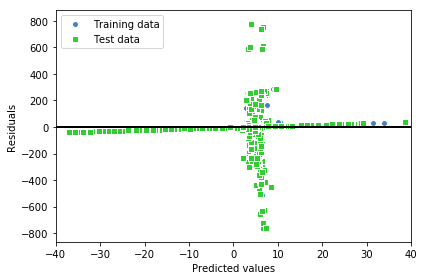

In [19]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-40, xmax=40, color='black', lw=2)
plt.xlim([-40, 40])
plt.tight_layout()

plt.show()

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 68.223, test: 75.965
R^2 train: 0.023, test: 0.020


In [21]:
print('Train Accuracy: %.3f' % lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % lr.score(X_test, y_test))

Train Accuracy: 0.023
Test Accuracy: 0.020
